# This is the Instabot part 2- An instagram bot which will scrape some important information for you!!!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [2]:
driver = webdriver.Chrome(executable_path = 'C:/Users/user/Downloads/Compressed/chromedriver') 
driver.get('https://www.instagram.com/')

In [3]:

driver.maximize_window()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "f0n8F ")))

In [4]:
SAMPLE_USERNAME='ab_213654'
SAMPLE_PASSWORD='thevibrator1'

user = driver.find_element_by_name('username')
user.send_keys(SAMPLE_USERNAME)
password=driver.find_element_by_name('password')
password.send_keys(SAMPLE_PASSWORD)

In [5]:
password.submit()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "XTCLo")))

# Q1.1 Re-Scraping the instagram handles which will appear on typing "Food" in the search bar.

In [6]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)

driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)

count=0
users=[]
# list of top 10 users will be stored in this list.
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()


In [7]:
#now i will iterate through all the usernames in this list and do whatever is asked in the question
followers=[]
#this list will contain the number of followers of 10 users.


for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3.2)

In [8]:
users

['foodtalkindia',
 'dilsefoodie',
 'foodiesince96',
 'yourfoodlab',
 'food_funk_fusion',
 'food_lunatic',
 'food',
 '_indian_food_lovers_',
 'dwok_cafe',
 'ruchika_asatkar']

In [9]:
for i in range(len(followers)):
    s = str(followers[i])
    if 'm' in s:
        followers[i]=float(s[:-1])*1000000
    elif 'k' in s:
        followers[i]=float(s[:-1])*1000
for i in range(len(followers)):
    s = str(followers[i])
    if "," in s:
        followers[i]=float(s.replace(",",""))
followers=np.array(followers, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
#now printing top 5 
top5=[]
for x in range(5):
    print(users[x])
    top5.append(users[x])

food_funk_fusion
foodiesince96
_indian_food_lovers_
food
dilsefoodie


# Q1.2. Finding the number of posts these handles have done in the previous 3 days.

In [10]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
#WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
#driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
no_of_posts=[]
for user in top5:
    time.sleep(3)
    print(user, end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[contains(@class, "Nnq7C")]/div/a/div[1]'):
        time.sleep(1)
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')

        if time_string[-1] in ['h', 's']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            cross.click()
            break
        time.sleep(2)
        cross.click()
        time.sleep(1)
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

food_funk_fusion have done 2 posts in past 3 days
foodiesince96 have done 0 posts in past 3 days
_indian_food_lovers_ have done 4 posts in past 3 days
food have done 5 posts in past 3 days
dilsefoodie have done 6 posts in past 3 days


# Q1.3. Plotting Graph

<Figure size 432x288 with 0 Axes>

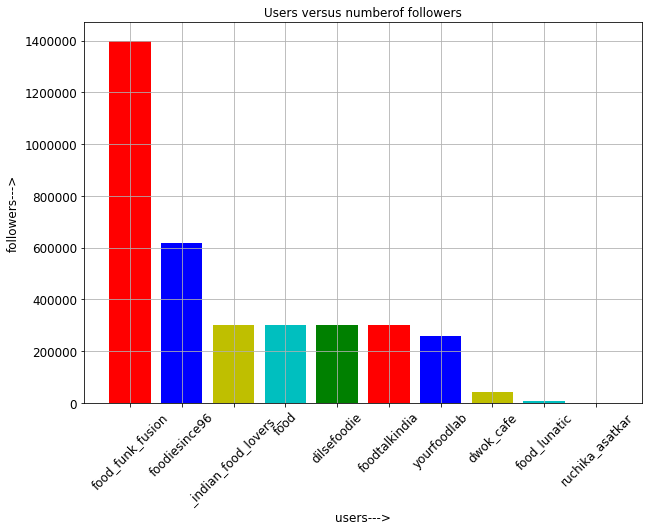

<Figure size 432x288 with 0 Axes>

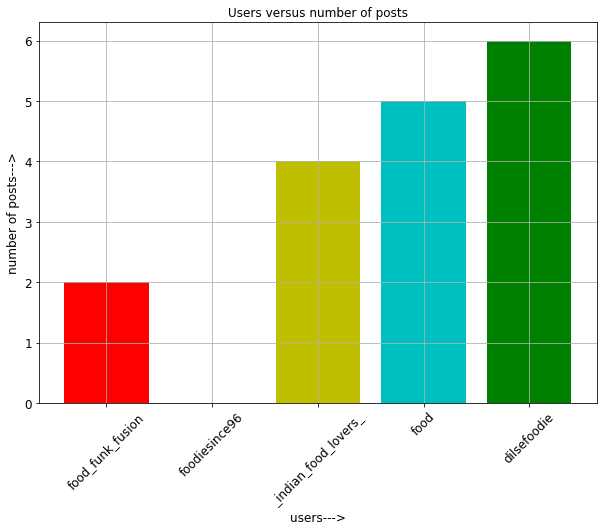

In [11]:
#plotting a graph between those 10 users and the number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(top5, no_of_posts, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

# Q2.1. Opening the 5 handles I obtained in the last question, and scraping the content of the first 10 posts of each handle.


In [12]:
#WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
#driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
content=[]
hashtags=[]
for user in top5:
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
        time.sleep(1)
        if count>=10:
            cross.click()
            break
        cross.click()
        time.sleep(2)

In [13]:
for i in content:
    print(i)
    print("-------------------------------------------------------------------------------------------------------------")


Weather demands something hot and sizzling!🤤🙈The feeling when a hot and  spicy sizzler is enjoyed in a rainy day is outstanding & Blissful💝A  must try for all foodies 😋😋Turn on your post notifications🔔for more drooling updates🤤🤤Use #foodfunkfusion to get featured💕💕#sizzlers#chinesefood#fries #foodies#foodporn#food#foodphotography#streetfood##foodblogger#cooking#instafood#foodstagram#yummy#streetfood#instadaily#instamood#blogger#mumbaikar#foodgasm#italianfood#picoftheday#foodgasm#bloggers#foodstylist#moretocome#instadailyphoto#foodie#instalove#paneer#k#vocalforlocal
-------------------------------------------------------------------------------------------------------------
🎀 6𝒦 𝒻𝒶𝓂𝒾𝓁𝓎 🎀 🎉🎉Thankyou @who.made.this.yumm_for being a part of my celebration and making my 6k more special by sending these amazing Customized Chocolate  Cake and cute cupcakes(with my favourite  pizza and brownies  customized on it😮☺️Taste 👅 ⭐️⭐️⭐️⭐️⭐️/5 The cake is simply die for and it was way too yummy and mou

# Q2.2. Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.


In [14]:
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)

In [15]:
dic=dict()#this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic

{'#foodfunkfusion': 10,
 '#sizzlers': 1,
 '#chinesefood': 1,
 '#fries': 1,
 '#foodies': 12,
 '#foodporn': 17,
 '#food': 27,
 '#foodphotography': 12,
 '#streetfood': 12,
 '#foodblogger': 12,
 '#cooking': 6,
 '#instafood': 14,
 '#foodstagram': 14,
 '#yummy': 19,
 '#instadaily': 9,
 '#instamood': 8,
 '#blogger': 7,
 '#mumbaikar': 10,
 '#foodgasm': 18,
 '#italianfood': 8,
 '#picoftheday': 8,
 '#bloggers': 6,
 '#foodstylist': 6,
 '#moretocome': 5,
 '#instadailyphoto': 4,
 '#foodie': 5,
 '#instalove': 4,
 '#paneer': 1,
 '#k': 1,
 '#vocalforlocal': 2,
 '#6k': 1,
 '#6kfollowers': 1,
 '#6kfam': 1,
 '#6kinstafollowers': 1,
 '#milestones': 1,
 '#collaboration': 2,
 '#cake': 2,
 '#chocolate': 2,
 '#foodbloggers': 12,
 '#cakesofinstagram': 2,
 '#dessert': 1,
 '#cakestagram': 2,
 '#blog': 6,
 '#cakelover': 1,
 '#instamilestone': 1,
 '#foodblog': 1,
 '#mumbaibasedbaker': 1,
 '#mumbaiindians': 1,
 '#mumbaicakes': 1,
 '#mumbaieats': 1,
 '#mumbaifoodie': 4,
 '#cakedecorating': 1,
 '#cakeart': 1,
 '#grat

# Q2.3. Creating a csv file with two columns : the word and its frequency


In [16]:
hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')
#hence the file is saved in the working directory

# Q2.4. Finding the hashtags that were most popular among these bloggers


In [17]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], "----->", frequency[i], "times")


food -----> 27 times
biryani -----> 20 times
yummy -----> 19 times
foodgasm -----> 18 times
foodporn -----> 17 times
instafood -----> 14 times
foodstagram -----> 14 times
streetfood -----> 12 times
foodblogger -----> 12 times
foodphotography -----> 12 times
foodies -----> 12 times
foodbloggers -----> 12 times
tasty -----> 11 times
fastfood -----> 10 times
tamilnadufoods -----> 10 times
friedrice -----> 10 times
muttonbiryani -----> 10 times
fishfry -----> 10 times
foodfunkfusion -----> 10 times
biryanilove -----> 10 times
icecream -----> 10 times
spicy -----> 10 times
southindianfoods -----> 10 times
rice -----> 10 times
chennaifoods -----> 10 times
foodlovers -----> 10 times
mumbaikar -----> 10 times
indianfoods -----> 10 times
foodblogging -----> 10 times
foodiesince96 -----> 10 times
veg -----> 10 times
nonveg -----> 10 times
love -----> 10 times
deliciousfood -----> 10 times
tandoori -----> 10 times
grillchickens -----> 10 times
chickenbiryani -----> 10 times
instadaily -----> 9 ti

# Q2.5. Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.


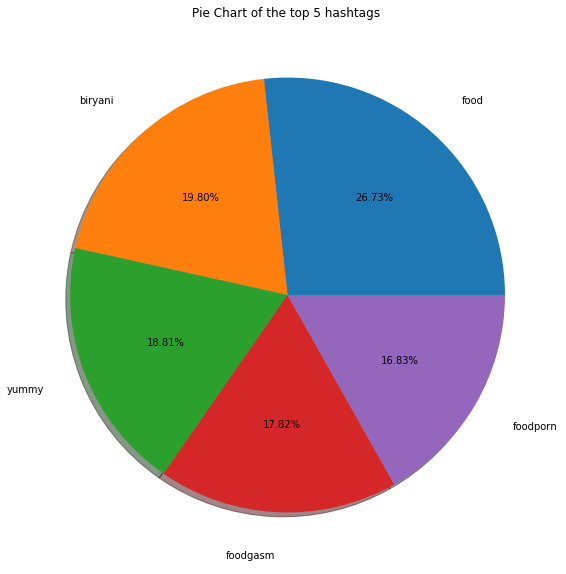

In [18]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

# Q3.1. Finding out the likes of the top 10 posts of the 5 handles obtained earlier.


In [19]:
like=[]
for user in top5:
    print(user, end="----> ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        #clicks on the post of the user being iterated.
        try:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "sqdOP ")]/span')))
            l=driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "sqdOP ")]/span').get_attribute('innerHTML')     
            s=str(l)
            if 'm' in s:
                s=float(s[:-1])*1000000
            elif 'k' in s:
                s=float(s[:-1])*1000
            elif "," in s:
                s=float(s.replace(",",""))
            else:
                s =float(s)
            likes+=s
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        cross = driver.find_element_by_xpath('//div[@class="                    Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')

        if count>=10:
            cross.click()
            break
        cross.click()
        time.sleep(1)
    print("total", likes, "likes on 10 latest posts")
    like.append(likes)

food_funk_fusion----> total 5774.0 likes on 10 latest posts
foodiesince96----> total 36040.0 likes on 10 latest posts
_indian_food_lovers_----> total 171743.0 likes on 10 latest posts
food----> total 18696.0 likes on 10 latest posts
dilsefoodie----> total 627576.0 likes on 10 latest posts


In [20]:
top5=np.array(top5)
top5

array(['food_funk_fusion', 'foodiesince96', '_indian_food_lovers_',
       'food', 'dilsefoodie'], dtype='<U20')

In [21]:
like=np.array(like)
#likes on the top 10 posts for those 5 users
like

array([  5774.,  36040., 171743.,  18696., 627576.])

In [22]:
followers[0:5]

array([1400000,  619000,  302000,  302000,  302000])

# Q3.2. Calculating the average likes for a handle.

In [23]:
average_likes=like/10
average_likes

array([  577.4,  3604. , 17174.3,  1869.6, 62757.6])

# Q3.3. Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle


In [24]:
ratio=followers[0:5]/average_likes
ratio

array([2424.66227918,  171.7536071 ,   17.58441392,  161.53187848,
          4.81216618])

# Q3.4. Creating a bar graph to depict the above obtained information.


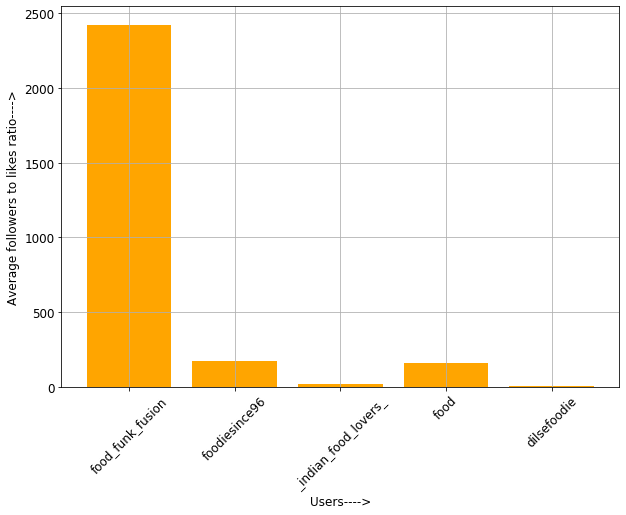

In [25]:
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='orange')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()